In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Load files

In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')

test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

train_df=train_df.set_index('PassengerId')
train_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


Cabin, Name and Ticket attributes are going to be deleted.

In [3]:
train_df = train_df.drop(['Cabin','Name', 'Ticket'],axis=1)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


There are missing values on some attributes.

In [5]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h4>Splitting data</h4>
In this case, we are creating a validation set from the train set.

In [6]:
from sklearn.model_selection import train_test_split

train_set, val_set= train_test_split(train_df,test_size=0.3)


<h3>EDA</h3>

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

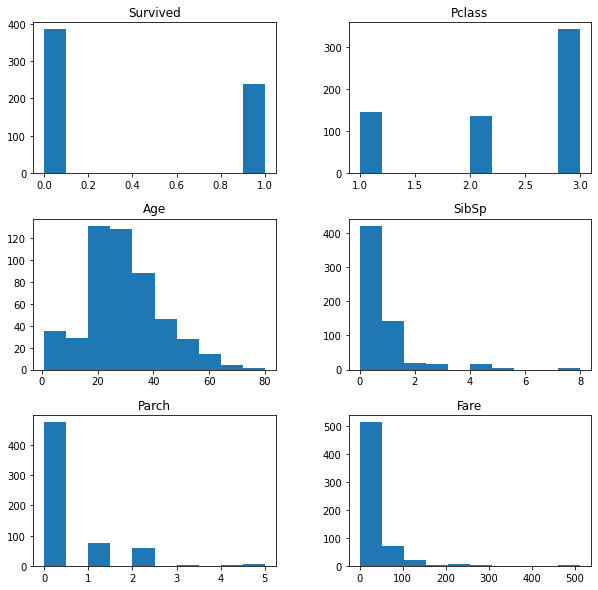

In [7]:
train_set.hist(figsize=(10,10),grid=False)

<AxesSubplot:>

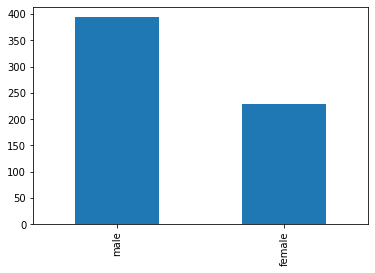

In [8]:
train_set['Sex'].value_counts().plot(kind='bar')

<AxesSubplot:>

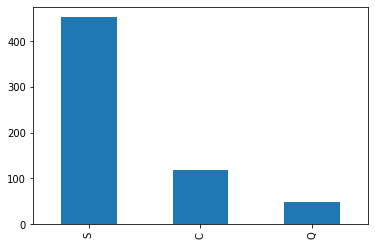

In [9]:
train_set['Embarked'].value_counts().plot(kind='bar')

<h3>Prepare Data</h3>

In [10]:
train_X = train_set.drop('Survived',axis=1)
train_y = train_set['Survived']

val_X = val_set.drop('Survived', axis=1)
val_y= val_set['Survived']

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')) ,
    ('std_scaler', StandardScaler())
])

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attr = ['Pclass','Age','SibSp','Parch','Fare']
cat_attr = ['Embarked','Sex']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attr),
    ('cat', OneHotEncoder(),cat_attr)
])

In [13]:
train_X_final = full_pipeline.fit_transform(train_X)

<h3>Training models</h3>

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest_model = RandomForestClassifier()
forest_model.fit(train_X_final,train_y)

val_X_final= full_pipeline.transform(val_X)

predict_val = forest_model.predict(val_X_final)
print(accuracy_score(val_y,predict_val)*100,'%')

78.35820895522389 %


In [15]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(learning_rate_init=0.001,max_iter=1000)
mlp_model.fit(train_X_final,train_y)

predict_val = mlp_model.predict(val_X_final)
print(accuracy_score(val_y,predict_val)*100,'%')

81.71641791044776 %


We are going to use RandomForestClassifier for the time being

<h3>Hyper-Parameter Tuning</h3>
Using GridSearch

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[10,100,1000],'max_features':['sqrt',1.0], 'max_depth':[None,10,100,1000]}
]

forest = RandomForestClassifier()
grid = GridSearchCV(forest,param_grid,cv=5,scoring='accuracy',return_train_score=True)
grid.fit(train_X_final,train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 10, 100, 1000],
                          'max_features': ['sqrt', 1.0],
                          'n_estimators': [10, 100, 1000]}],
             return_train_score=True, scoring='accuracy')

In [17]:
results = grid.cv_results_
for m,p in zip(results['mean_test_score'],results['params']):
    print(m,p)

0.7898709677419355 {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 10}
0.7961935483870969 {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
0.7978064516129033 {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 1000}
0.7817290322580646 {'max_depth': None, 'max_features': 1.0, 'n_estimators': 10}
0.8106451612903227 {'max_depth': None, 'max_features': 1.0, 'n_estimators': 100}
0.809058064516129 {'max_depth': None, 'max_features': 1.0, 'n_estimators': 1000}
0.8106967741935485 {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 10}
0.8058580645161291 {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
0.8106580645161291 {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 1000}
0.8122193548387099 {'max_depth': 10, 'max_features': 1.0, 'n_estimators': 10}
0.8315096774193549 {'max_depth': 10, 'max_features': 1.0, 'n_estimators': 100}
0.8283096774193549 {'max_depth': 10, 'max_features': 1.0, 'n_estimators': 1000}
0.794567741935484 {'max

In [18]:
grid.best_params_

{'max_depth': 10, 'max_features': 1.0, 'n_estimators': 100}

In [19]:
full_X = train_df.drop('Survived',axis=1)
y = train_df['Survived']
X= full_pipeline.transform(full_X)
test_X=test_df[full_X.columns]
test_X_final= full_pipeline.transform(test_X)

full_forest_model =grid.best_estimator_
full_forest_model.fit(X,y)



predict_test = full_forest_model.predict(test_X_final)

In [20]:
submission = pd.DataFrame({'PassengerId':test_df.PassengerId,'Survived':predict_test})
submission.to_csv('submission.csv',index=False)